# Sentiment analysis with Logistic Regression

### Some plotting functions

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/logistic_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 215 (delta 102), reused 168 (delta 55), pack-reused 0
Receiving objects: 100% (215/215), 35.23 MiB | 14.88 MiB/s, done.
Resolving deltas: 100% (102/102), done.
Checking out files: 100% (49/49), done.
/content/machine_learning_1/logistic_regression


In [2]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils
import math


In [3]:
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

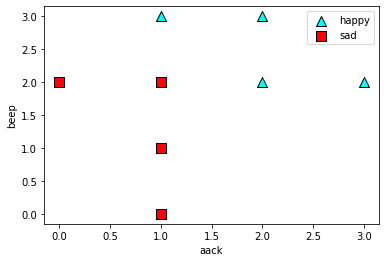

In [4]:
# Plotting the points
utils.plot_points(features, labels)

### Logistic regression

In [5]:
def sigmoid(x):
    
    '''implement sigmoid function'''
    output= 1/(1+np.exp(-x))
    return output

def score(weights, bias, features):

    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    
    ''' implement prediction calculation using sigmoid and score functions'''
    scr=score(weights, bias, features)
    output=sigmoid( scr)
    return output

def log_loss(weights, bias, features, label):
    
    ''' implement log_loss calculation using prediction function'''
    y_pred=prediction(weights, bias, features)
    output = -label*np.log(y_pred)-((1-label)*np.log(1-y_pred))
    return output

def total_log_loss(weights, bias, X, y):

    total_error = 0
    for i in range(len(X)):
        total_error += log_loss(weights, bias, X[i], y[i])
    return total_error

In [6]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    
    '''update the weights and bias using a single data sample'''
    error= label-prediction(weights, bias, features)
    weights[0]=weights[0]+learning_rate*error*features[0]
    weights[1]=weights[1]+learning_rate*error*features[1]
    bias=bias+learning_rate*(error)

    return weights, bias

In [7]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 2000):
    utils.plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Uncomment the following line of code to View the plots of all the classifiers
        # utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    utils.draw_line(weights[0], weights[1], bias)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

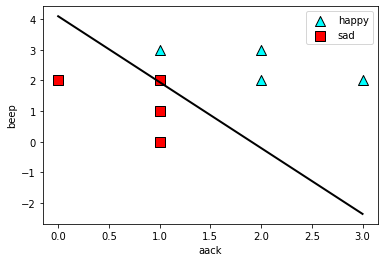

([1.2143303302161375, 0.5649828024265428], -2.3133210954763745)

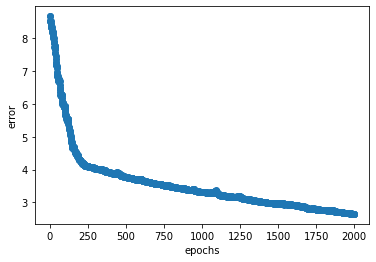

In [8]:
logistic_regression_algorithm(features, labels)

# Logistic SKlearn

In [9]:
from sklearn.linear_model import LogisticRegression
# Train logistic regression
clf= LogisticRegression().fit(features, labels)

In [10]:
clf.score(features, labels)

1.0

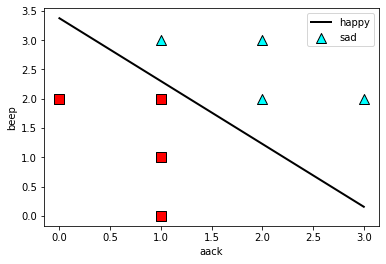

In [11]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()